In [1]:
import pandas as pd

In [2]:
sample_sub = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_x = train.drop(['id','Class'],axis=1)
train_y = train['Class']

In [45]:
import seaborn as sns

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [47]:
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\leosimoe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

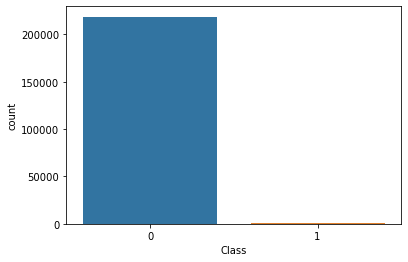

In [48]:
sns.countplot(train['Class'])

In [49]:
train.groupby('Class')['Class'].count()[1]

469

In [50]:
train.columns.size

32

In [51]:
import matplotlib.pyplot as plt

In [52]:
fig_name= train.columns[0] + ' X ' + train.columns[1] + '.png'


In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in range(1,train.columns.size):
    for j in range(1,train.columns.size):
        if i>j:
            plt.clf()
            fig_name= '.\plots\\' + train.columns[i] + ' X ' + train.columns[j] + '.png'
            sns.scatterplot(data=train, x=train.columns[i], y=train.columns[j],hue='Class')
            plt.savefig(fig_name)
            plt.clf()
            
    

<Figure size 842.4x595.44 with 0 Axes>

In [71]:
train.sort_values('Class', ascending=True, inplace=True)

<AxesSubplot:xlabel='Amount', ylabel='V20'>

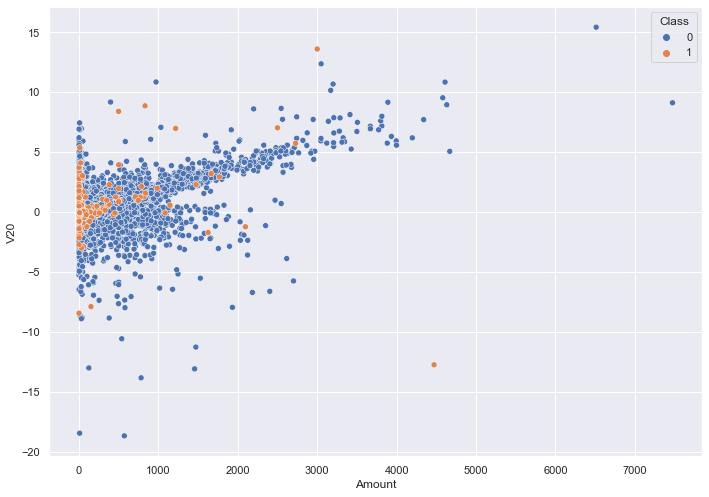

In [72]:
sns.scatterplot(data=train, x=train.columns[30], y=train.columns[21],hue='Class')

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
test_feat = SelectKBest(k=10)
fit = test_feat.fit(train_x,train_y)

In [ ]:
from numpy import set_printoptions
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(train_x)

In [ ]:
train_kbest_col = train_x.columns[fit.get_support()]

In [ ]:
train_kbest_col

In [ ]:
train_kbest = train.loc[:,train_kbest_col]

In [4]:
fraud = train[train.Class==1]

In [5]:
from sklearn.utils import resample
downsample = resample(train,
             replace=True,
             n_samples=469,
             )

print(downsample.shape)

C:\Users\leosimoe\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(469, 32)


In [6]:
downsample.groupby('Class')['Class'].count()

Class
0    469
Name: Class, dtype: int64

In [7]:
balanced_train = pd.concat([downsample, fraud])

In [8]:
balanced_train_x = balanced_train.drop(['id','Class'], axis=1)
balanced_train_y = balanced_train.Class
test_x = test.drop(['id'], axis=1)

In [ ]:
test_x

In [40]:
from sklearn.linear_model import LogisticRegression



log = LogisticRegression(solver='liblinear').fit(X_train, balanced_train_y)
log_pred = log.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(balanced_train_y, log_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       469
           1       0.77      0.67      0.72       469

    accuracy                           0.73       938
   macro avg       0.74      0.73      0.73       938
weighted avg       0.74      0.73      0.73       938



In [22]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(balanced_train_x)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(test_x)

In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [ ]:
X_test.shape

In [ ]:
balanced_train_x

In [ ]:
# Fit the classifier
knn.fit(X_train, balanced_train_y)

In [ ]:
# Make predictions
predictions = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(balanced_train_y, predictions))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(balanced_train_y, predictions)

In [ ]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3, verbose=4)
#Fit the model
best_model = clf.fit(balanced_train_x,balanced_train_y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


In [ ]:
knn3 = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=2)
knn3.fit(balanced_train_x_kbest,balanced_train_y)

In [ ]:
X

In [ ]:
predictions = knn3.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(balanced_train_y, predictions))

In [ ]:
predictions.shape

In [41]:
test_sub = pd.DataFrame(log_pred, columns=['Class'])


test_sub['id'] = test.id

test_sub = test_sub[['id','Class']]

test_sub.to_csv('test_sub_log_norm.csv', index=False)

In [39]:
test_sub

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0
...,...,...
933,220062,0
934,220063,1
935,220064,1
936,220065,0


In [ ]:
test_sub